## Credit Card Fraud Detection

### 1. 데이터 읽고 관찰하기

In [53]:
# 데이터 읽기

import pandas as pd

data_path = '../data/creditcard.csv'
raw_data = pd.read_csv(data_path)

raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# 컬럼 확인

raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [55]:
# class >> 사기 유무 결정 컬럼
# 데이터 수 확인

raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
# (위 데이터수 / 전체 데이터수 * 100) = % of fraud

frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


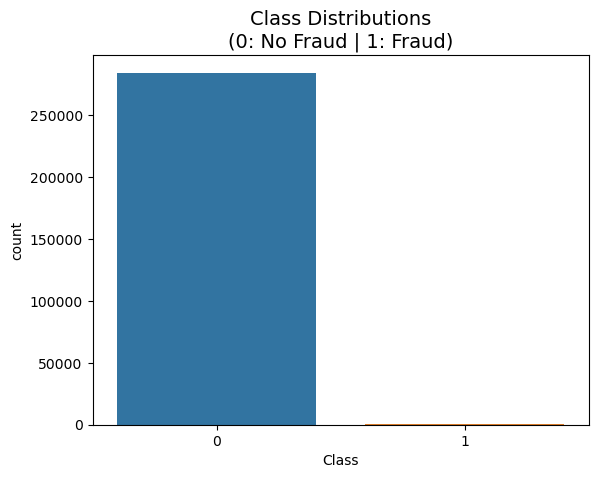

In [57]:
# 그래프 표현

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Class', data=raw_data)
plt.title('Class Distributions\n(0: No Fraud | 1: Fraud)', fontsize=14)
plt.show()

In [58]:
# 현재 상태 그대로 훈련/검증 데이터 분할해보기

X = raw_data.iloc[:, 1:-1] # 첫번째 컬럼인 Time은 사용하지 않으며, 마지막 컬럼 (답) 이 Class 이므로 제외하는 것
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [59]:
# 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13, stratify=y)

In [60]:
# 데이터 불균형 확인 (1)

import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [61]:
# 데이터 불균형 확인 (2)

tmp = np.unique(y_train, return_counts=True)[1] # y_train의 0과 1의 갯수만 가져오는 것

tmp[1] / len(y_train) * 100 # 전체 대비 fraud percentage 확인

0.17254870488152324

### 2. 분류기 적용해보기

In [62]:
# 분류기 성능을 가져오는 함수 작성

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [63]:
# 위 성능을 출력하는 함수 작성

from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('===> Confusion Matrix <===')
    print(confusion)
    print('==========================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [64]:
%%time

# Logistic Regression 적용

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

===> Confusion Matrix <===
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
Recall: 0.5946, F1: 0.7126, AUC:0.7972
CPU times: total: 6.25 s
Wall time: 6.26 s


In [65]:
%%time
# wall time 보려면 위 문구가 제일 먼저 나와야 함

# Decision Tree 적용

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth = 4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

===> Confusion Matrix <===
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
Recall: 0.7162, F1: 0.7910, AUC:0.8580
CPU times: total: 3.11 s
Wall time: 3.14 s


In [66]:
%%time

# Random Forest 적용

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

===> Confusion Matrix <===
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
Recall: 0.7432, F1: 0.8365, AUC:0.8716
CPU times: total: 4min 8s
Wall time: 27.6 s


In [67]:
%%time

# Light GBM 적용

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000,
                          num_leaves=64, boost_from_average=False)

lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

* 속도: RandomForest > LGBM > LogisticRegression > DecisionTree (우측으로 갈 수록 빠름)
* Recall: LogisticRegression < DecisionTree < RandomForest < LGBM (우측으로 갈 수록 높아짐) <br>

* 은행 입장: recall이 높을 수록 좋음 (사기 검출 확률 높아짐)
* 사용자 입장: precision이 높을 수록 좋음 (정상 고객 오인율 줄어듦)

### 3. 분류기 성능 비교

In [68]:
# 모델과 데이터를 기입하면 성능을 출력하는 함수 생성

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [69]:
# 다수의 모델 성능을 정리하여 dataframe 반환하는 함수 작성

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [70]:
# 분류 모델 성능 비교

import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


### 4. 데이터 정리 후 다시 분류

* standard scaler
* log 이용하여 특정 값을 변경해보고 성능 변화 확인

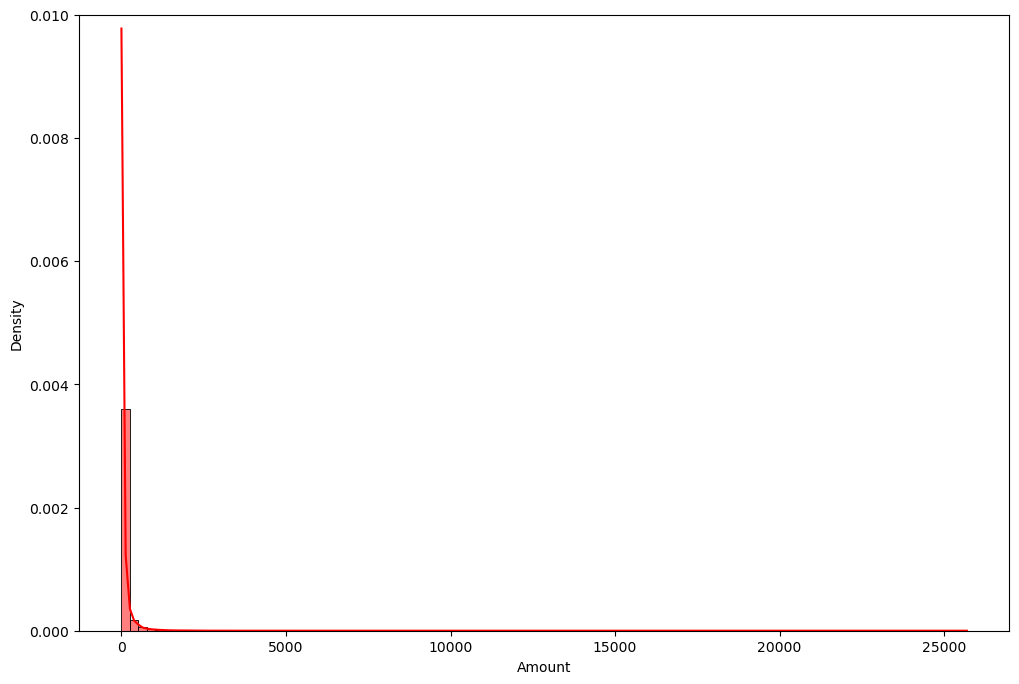

In [71]:
# raw_data amount 컬럼 확인 (신용카드 사용 금액)
# 다른 컬럼은 이름이 없어 확인이 어려우므로 일단 당장 확인이 가능한 컬럼 이용하여 분석

plt.figure(figsize=(12, 8))
sns.histplot(raw_data['Amount'], color='r', stat='density', bins=100, kde=True)
# distplot 사라질 예정이므로, histplot 이용
# displot 이용할 경우, stat='density', kde=True 조건 추가
plt.ylim(0, 0.01) # density 차이가 너무 많이 나므로 y-lim 변경

plt.show()

In [20]:
# amount에 standardscaler 적용 후 데이터프레임 카피본에 기입

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [21]:
# 훈련 / 검증 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [22]:
# 모델 재평가 (standard sclaed 된 값 이용)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


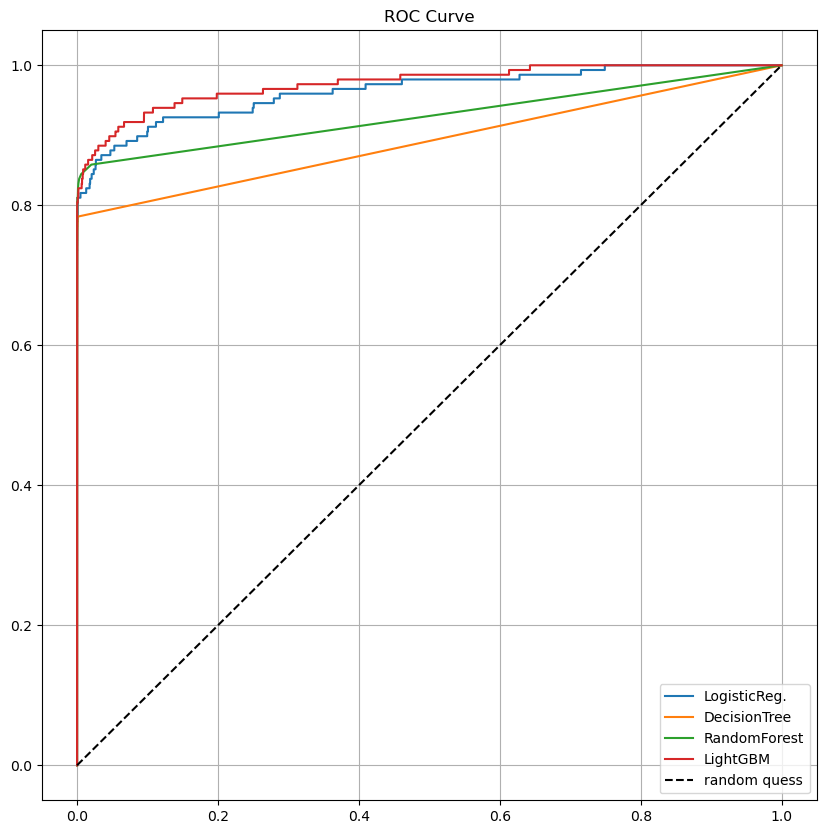

In [23]:
# 모델별 ROC 커브 확인

from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in  range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])
    
    plt.plot([0, 1], [0, 1], 'k--', label='random quess')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)

In [24]:
# log scale 이용

amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


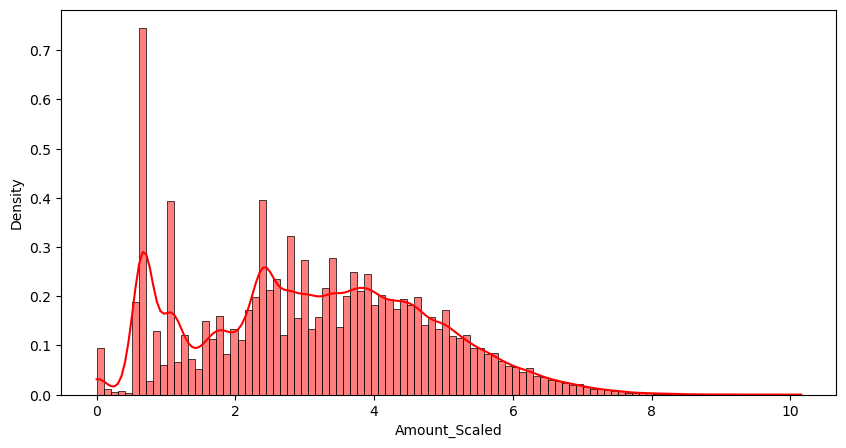

In [25]:
# 분포 변화 확인

plt.figure(figsize=(10,5))
sns.histplot(raw_data_copy['Amount_Scaled'], color='r', stat='density', bins=100, kde=True)
plt.show()

In [26]:
# 모델 재평가 (log scaled 된 값 이용)

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


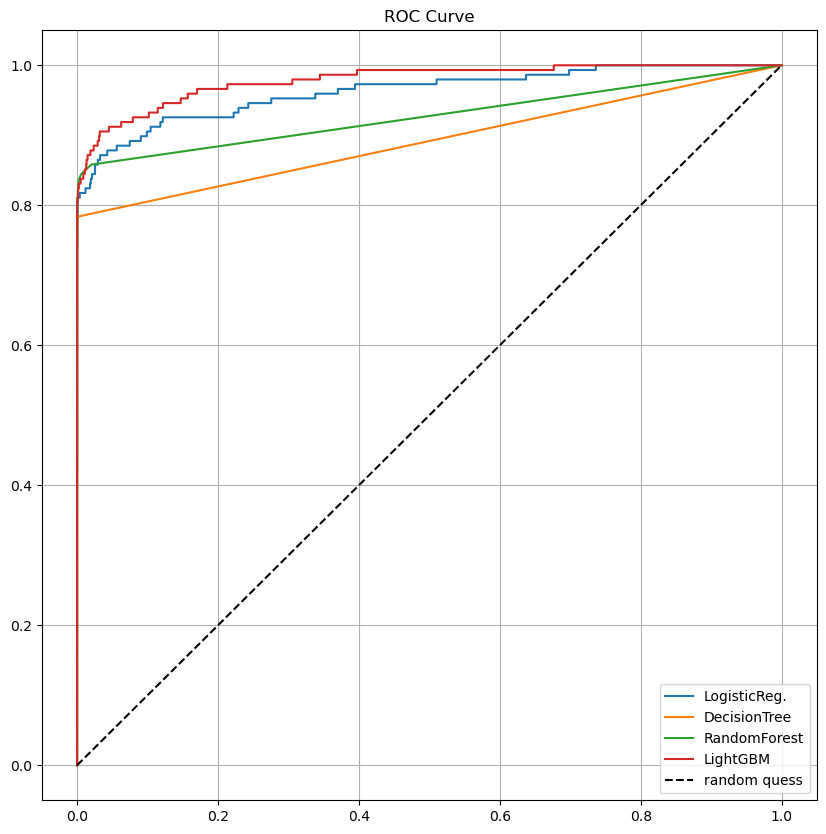

In [27]:
# 모델별 ROC 확인

draw_roc_curve(models, model_names, X_test, y_test)

## 5. 데이터 Outlier 확인 및 정리 후 분류

<Axes: >

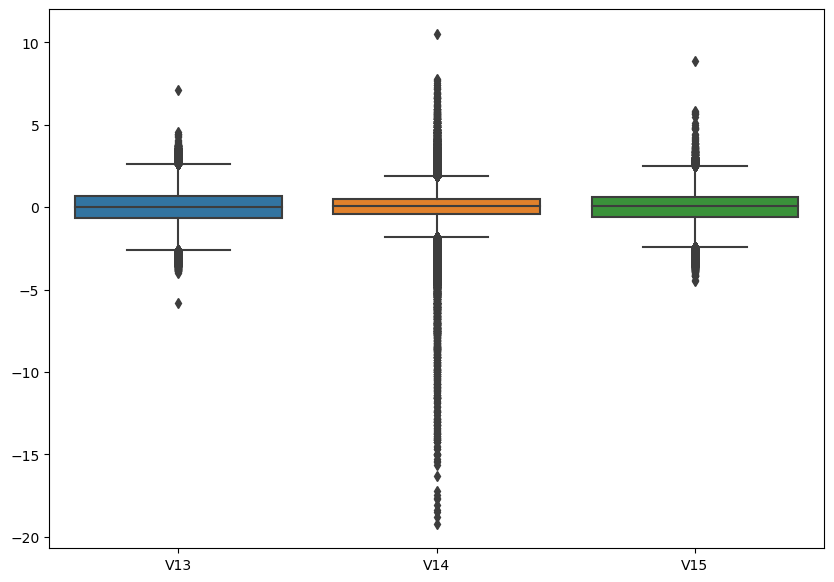

In [28]:
# 특이데이터 확인 (임의의 컬럼 선정)

import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])

In [29]:
# Outlier 정리를 위해 인덱스 파악하는 코드

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

# weight >> iqr 1.5배 조정 위함

In [37]:
# V14 컬럼에 대해 outlier 찾기

get_outlier(df=raw_data, column='V14', weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [38]:
# outlier 제거 전 데이터 프레임 확인

raw_data_copy.shape

(284807, 29)

In [39]:
# 위에서 찾은 outlier 제거하기

outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [40]:
# outlier 제거한 데이터 분할

X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True) # 기존 데이터는 outlier 살아있으므로 제거 후 y에 넣음
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [41]:
# 모델 재평가 (outlier 제거 후 데이터프레임 이용, 값은 log scaled)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


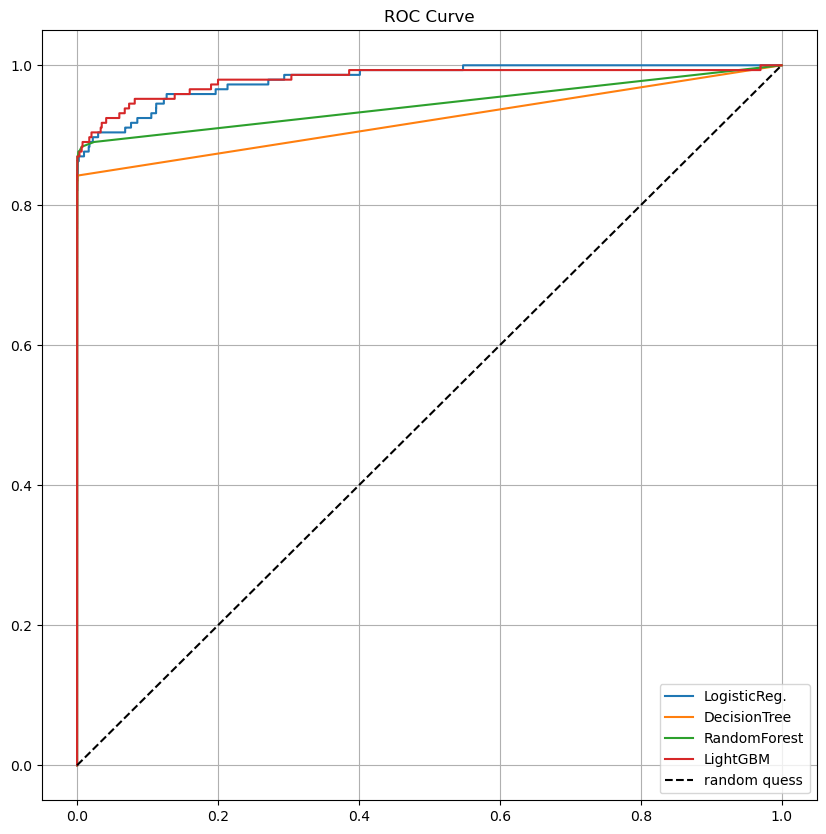

In [42]:
draw_roc_curve(models, model_names, X_test, y_test)

* outlier 제거 후 수치가 전체적으로 향상되었음을 확인함

## 6. SMOTE Oversampling 후 분류

* Undersampling: 많은 수의 데이터를 적은 수의 데이터로 강제 조정
* Oversampling: 원본 데이터의 feature 값들을 아주 약간 변경하여 데이터 양 증식
  - 대표적인 방식 = SMOTE(Synthetic Minority Over-sampling Technique)
  - 적은 데이터 세트에 있는 개별 데이터를 kNN 방법으로 찾아, 데이터 분포 사이에 새로운 데이터를 만드는 방식
  - imbalanced-learn 이라는 파이썬 패키지 있음

In [43]:
# ! pip install imbalanced-learn

     ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
     ------------------------------------- 235.6/235.6 kB 14.1 MB/s eta 0:00:00


In [45]:
# SMOTE 적용
# scaler 제외, 데이터 조작은 train 데이터 대상으로 해야 함. (test 데이터는 오염되면 안됨.)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [49]:
# SMOTE 적용된 결과 확인 (1)

print(f'{X_train.shape}, {y_train.shape}\n{X_train_over.shape}, {y_train_over.shape}')

(199362, 29), (199362,)
(398040, 29), (398040,)


In [50]:
# SMOTE 적용된 결과 확인 (2)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [51]:
# 모델 재평가 (outlier 제거 후 데이터프레임 이용, 값은 log scaled, SMOTE 적용하여 fraud 샘플 수 늘림)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999485,0.875000,0.815068,0.843972,0.907435


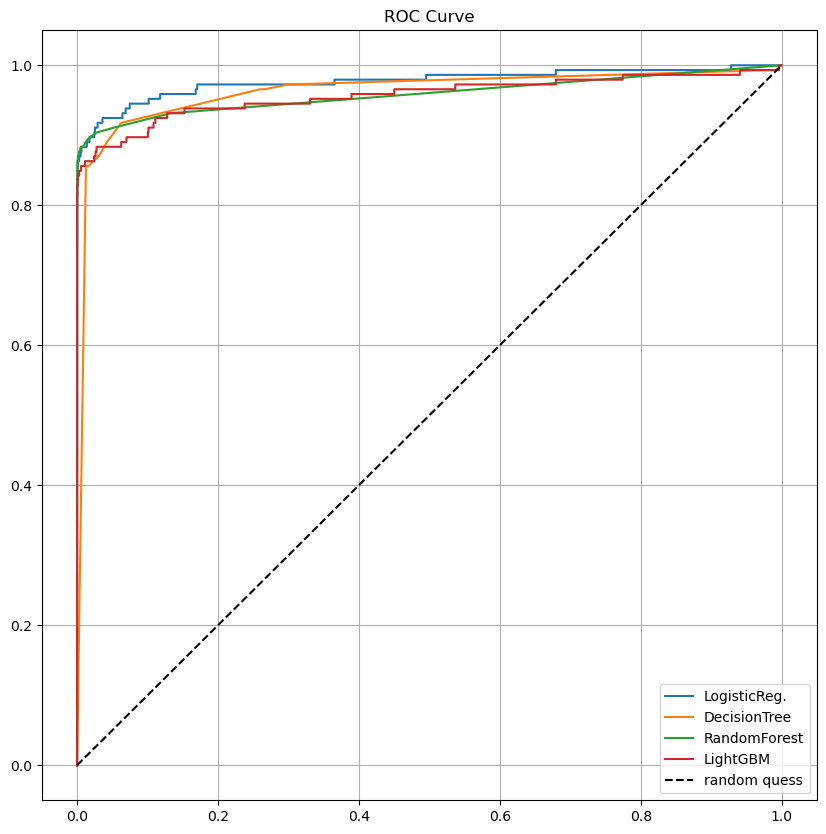

In [52]:
# roc curve 확인

draw_roc_curve(models, model_names, X_test, y_test)